# <b> MACHINE LEARNING PROJECT 
## <b> MOVIE RECOMMEND
## WE HAVE DATA OF NETFLIX WICH WE ARE GOING TO USE FOR RECOMMEND MOVIES

# COLLACTING DATA

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("netflix_titles.csv")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# data understanding

In [3]:
df.columns.to_list()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [4]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.shape

(8807, 12)

In [7]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [8]:
print("available data is from",df["release_year"].min(),"to",df["release_year"].max())

available data is from 1925 to 2021


## Column Information 
1. **show_id** : Unique ID for every Movie / Tv Show
2. **type** : Identifier - A Movie or TV Show
3. **title** : Title of the Movie / Tv Show
4. **director** : Director of the Movie
5. **cast** : Actors involved in the movie / show
6. **country** : Country where the movie / show was produced
7. **date_added** : Date it was added on Netflix
8. **release_year** : Actual Releaseyear of the movie / show
9. **rating** : TV Rating of the movie / show
10. **duration** : Total Duration - in minutes or number of seasons
11. **listed_in** : Genre
12. **description**: The Summary description


# data cleaning

## missing values

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.isnull().sum()/len(df)*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

<Axes: >

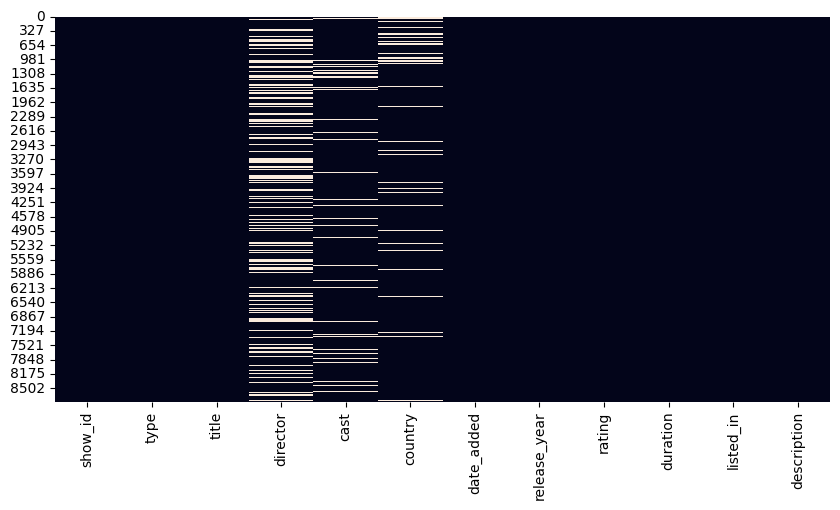

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cbar=0)

In [12]:
df[["director","cast","country","date_added"]] = df[["director","cast","country","date_added"]].fillna("Unknown")


df['rating'] = df['rating'].fillna(df['rating'].mode()[0])


df['duration'] = df['duration'].fillna("Unknown")

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## duplicates

In [14]:
df.duplicated().sum()

np.int64(0)

# <b> MACHINE LEARNING <B>

# MOVIES RECOMMEND SYSTEM

In [15]:
movies = df[["show_id","title","listed_in","description"]]
movies

,show_id,title,listed_in,description
0,s1,Dick Johnson Is Dead,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...
8802,s8803,Zodiac,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [16]:
movies["tags"] = movies["description"]+movies["listed_in"]
new_data = movies.drop(columns=["listed_in","description"])
new_data

,show_id,title,tags
0,s1,Dick Johnson Is Dead,"As her father nears the end of his life, filmm..."
1,s2,Blood & Water,"After crossing paths at a party, a Cape Town t..."
2,s3,Ganglands,To protect his family from a powerful drug lor...
3,s4,Jailbirds New Orleans,"Feuds, flirtations and toilet talk go down amo..."
4,s5,Kota Factory,In a city of coaching centers known to train I...
...,...,...,...
8802,s8803,Zodiac,"A political cartoonist, a crime reporter and a..."
8803,s8804,Zombie Dumb,"While living alone in a spooky town, a young g..."
8804,s8805,Zombieland,Looking to survive in a world taken over by zo...
8805,s8806,Zoom,"Dragged from civilian life, a former superhero..."


In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [18]:
a = CountVectorizer(max_features=8807,stop_words="english")

In [19]:
vector = a.fit_transform(new_data["tags"].values.astype("U")).toarray()

In [20]:
similarity = cosine_similarity(vector)
similarity

array([[1.        , 0.        , 0.        , ..., 0.        , 0.06262243,
        0.        ],
       [0.        , 1.        , 0.40089186, ..., 0.        , 0.        ,
        0.08451543],
       [0.        , 0.40089186, 1.        , ..., 0.        , 0.04287465,
        0.07905694],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.12524486,
        0.05773503],
       [0.06262243, 0.        , 0.04287465, ..., 0.12524486, 1.        ,
        0.10846523],
       [0.        , 0.08451543, 0.07905694, ..., 0.05773503, 0.10846523,
        1.        ]], shape=(8807, 8807))

In [21]:
distance = sorted(list(enumerate(similarity[2])),reverse=1,key=lambda vector:vector[1])
for i in distance[0:6]:
    print(new_data.iloc[i[0]].title)

Ganglands
The Eagle of El-Se'eed
Lupin
Miss Dynamite
Fugitiva
Fatal Destiny


In [22]:
suggestions = df[["title","type","release_year", "rating", "duration", "listed_in","cast","description"]]
suggestions

,title,type,release_year,rating,duration,listed_in,cast,description
0,Dick Johnson Is Dead,Movie,2020,PG-13,90 min,Documentaries,Unknown,"As her father nears the end of his life, filmm..."
1,Blood & Water,TV Show,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","After crossing paths at a party, a Cape Town t..."
2,Ganglands,TV Show,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...","Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,TV Show,2021,TV-MA,1 Season,"Docuseries, Reality TV",Unknown,"Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,TV Show,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...
8802,Zodiac,Movie,2007,R,158 min,"Cult Movies, Dramas, Thrillers","Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...","A political cartoonist, a crime reporter and a..."
8803,Zombie Dumb,TV Show,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies",Unknown,"While living alone in a spooky town, a young g..."
8804,Zombieland,Movie,2009,R,88 min,"Comedies, Horror Movies","Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",Looking to survive in a world taken over by zo...
8805,Zoom,Movie,2006,PG,88 min,"Children & Family Movies, Comedies","Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...","Dragged from civilian life, a former superhero..."


In [23]:
def recommend(movie_title):
    try:
        index = suggestions[suggestions['title'] == movie_title].index[0]
        similarity_scores = list(enumerate(similarity[index]))
        similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
        similarity_scores = similarity_scores[1:6]
        movie_indices = [i[0] for i in similarity_scores]
        return suggestions.iloc[movie_indices]
    except IndexError:
        print("No Similar Movie Was Available in dataset")
        return pd.DataFrame()

# FINAL FUNCTION

In [24]:
a = input("Enter movie")
b = recommend(a)
display(b)

,title,type,release_year,rating,duration,listed_in,cast,description
843,JoJo's Bizarre Adventure,TV Show,2016,TV-MA,3 Seasons,"Anime Series, International TV Shows","Kazuyuki Okitsu, Tomokazu Sugita, Daisuke Ono,...",Multiple generations of the Joestar family – a...
4862,Saint Seiya: The Lost Canvas,TV Show,2009,TV-MA,1 Season,"Anime Series, International TV Shows","Tetsuya Kakihara, Hiro Shimono, Aya Hirano, At...",This anime adventure follows the battle betwee...
7217,Knights of Sidonia,TV Show,2015,TV-MA,2 Seasons,"Anime Series, International TV Shows","Ryota Osaka, Aya Suzaki, Aki Toyosaki, Takahir...",A hero rises to save a world that's also a spa...
2958,Is It Wrong to Try to Pick Up Girls in a Dungeon?,TV Show,2015,TV-MA,1 Season,"Anime Series, International TV Shows","Yoshitsugu Matsuoka, Inori Minase, Saori Onish...","Lovable goof Bell Cranel wants an adventure, a..."
6291,Beyblade: Metal Fusion,TV Show,2009,TV-Y7,1 Season,"Anime Series, Kids' TV","Aki Kanada, Satoshi Hino, Emiri Kato, Kei Shin...","In this anime adventure series for kids, the f..."
